In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df = pd.read_csv('data/final_datasets/cleaned_train_all.csv')

In [3]:
df = df.drop('longitude', axis=1)
df = df.drop('latitude', axis=1)
df = df.drop('label', axis=1)
print(df)

           type      NDVI      NDBI       BSI       bio1       bio2  \
0     earthwork  0.425166 -0.277196 -0.215753  25.870832  10.008333   
1     earthwork  0.481983 -0.225465 -0.153677  26.037500  10.125000   
2     earthwork  0.418867 -0.158282 -0.132422  25.854166  10.058333   
3     earthwork  0.355608 -0.059675 -0.044102  25.716667  10.000000   
4     earthwork  0.514203 -0.110540 -0.074577  25.962500  10.408334   
...         ...       ...       ...       ...        ...        ...   
2076  earthwork  0.431288 -0.052833 -0.001065  26.262501  11.075000   
2077  earthwork  0.400672  0.005347  0.063598  25.616667  11.650000   
2078  earthwork  0.486630 -0.083438 -0.022223  25.700001  11.666667   
2079  earthwork  0.715786 -0.294071 -0.251704  25.941668  10.866667   
2080  earthwork  0.521827 -0.322551 -0.235900  26.166666  10.666666   

           bio3        bio4       bio5       bio6  ...    distriver1  \
0     71.488091   74.695091  32.299999  18.299999  ...  7.451016e+05   
1  

In [4]:
X = df.drop('type', axis=1)
y = df['type']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# Step 3: Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=219, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,219
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred = rf.predict(X_test)

In [8]:
# Step 5: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

         ADE       0.87      0.76      0.81        91
   earthwork       0.92      1.00      0.96       251
       other       0.94      0.83      0.88        75

    accuracy                           0.91       417
   macro avg       0.91      0.86      0.88       417
weighted avg       0.91      0.91      0.91       417



In [11]:
importances = rf.feature_importances_


In [12]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

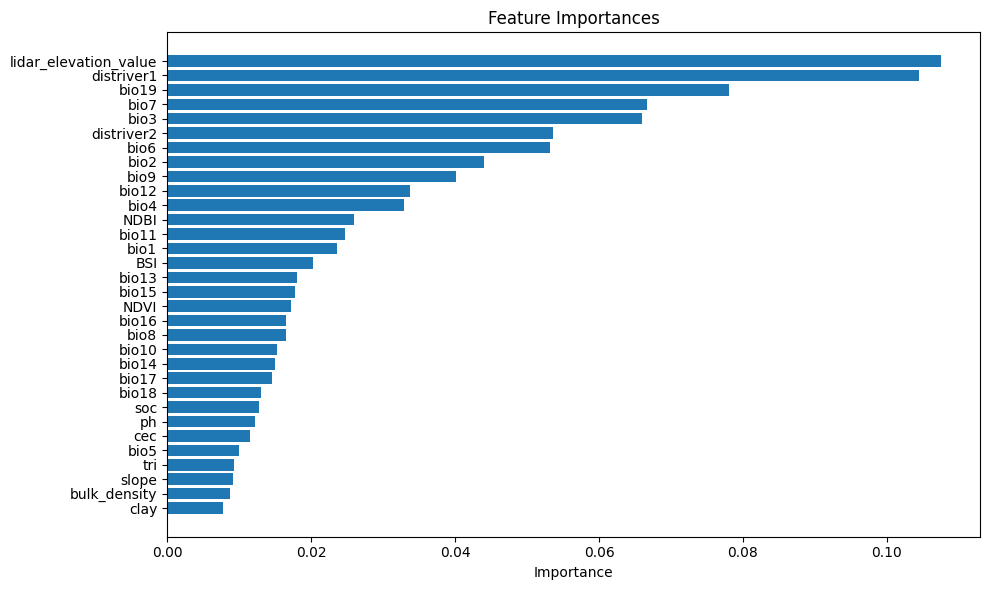

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# Hyperparameter tuning
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
# save model
import joblib


In [ ]:
joblib.dump(best_rf, 'random_forest_model.pkl')
